## Women representation in national parliaments 

This is an analysis on the women representation in national parliaments around the world. The data are obtained from https://data.ipu.org/historical-women. The historical data are used to analyze the trend of women representation in the parliments in different countries.


### Goals :
    1. Learning how to clean a real world dataset.
    2. Use data processing tools (pandas, numpy) and vizualization tools (matplotlib, folium) to get insights.
    3. Draw some conclusions from the data analysis.

In [38]:
#!pip3 install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import requests
from openpyxl import Workbook
import re

In [39]:
#loading the dataset from https://data.ipu.org

url = 'https://data.ipu.org/sites/default/files/other-datasets/women_in_parliament-historical_database-1945_to_2018.xlsx'
r = requests.get(url).content
df = pd.read_excel(r) 
df.head()

,Country,Region,Election / Renewal,Year,Month,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber,NOTES
0,Afghanistan,ASIA,Yes,1965,July,Lower,210,4,0.019048,First legislature of Afghanistan after the abo...
1,Afghanistan,ASIA,Yes,1965,July,Upper,84,0,0,First legislature of Afghanistan after the abo...
2,Afghanistan,ASIA,Yes,1969,NaN,Lower,216,0,0,Parliament was dissolved following a military ...
3,Afghanistan,ASIA,Yes,1969,NaN,Upper,84,0,0,Parliament was dissolved following a military ...
4,Afghanistan,ASIA,Yes,1988,NaN,Lower,235,7,0.029787,"Collapse of constitutional institutions, inclu..."


In [40]:
#df['% Of Women in Chamber']  = df['% Of Women in Chamber'].replace(',','.')
#obj = df['% Of Women in Chamber'].select_dtypes(include=['object']).apply(lambda x: x.apply(lambda y: float(y.replace(',', '.'))))
#df0[obj.columns] = obj 
#np.array(df['% Of Women in Chamber']).select_dtypes(include=['object'])

df[df['Country']=='United States of America']

,Country,Region,Election / Renewal,Year,Month,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber,NOTES
3410,United States of America,AME,Yes,1946,November,Lower,440,11,0.025,Lower House total includes 5 non-voting members
3411,United States of America,AME,Yes,1946,November,Upper,100,0,0,Elections for the Upper House are held every 2...
3412,United States of America,AME,Yes,1948,November,Lower,440,7,0.015909,NaN
3413,United States of America,AME,Yes,1948,November,Upper,100,1,0.01,Elections for the Upper House are held every 2...
3414,United States of America,AME,Yes,1950,November,Lower,440,9,0.020455,NaN
...,...,...,...,...,...,...,...,...,...,...
3479,United States of America,AME,Yes,2014,November,Upper,100,20,0.2,NaN
3480,United States of America,AME,Yes,2016,November,Lower,433,83,0.191686,NaN
3481,United States of America,AME,Yes,2016,November,Upper,100,20,0.2,NaN
3482,United States of America,AME,Yes,2018,November,Lower,434,102,0.235023,Woman Speaker elected.


In [41]:
df.shape

(3815, 10)

As we can observe the dataset contains historical figures with 3815 rows. For a given country there exists multiple rows indicating the number of women in the parliment selected in each election respectively for lower and upper chamber.

In [42]:
#Let's check the women representation in Canada. We have data from 1945 to 2018. 
df[df['Country']=='Afghanistan']

,Country,Region,Election / Renewal,Year,Month,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber,NOTES
0,Afghanistan,ASIA,Yes,1965,July,Lower,210,4,0.019048,First legislature of Afghanistan after the abo...
1,Afghanistan,ASIA,Yes,1965,July,Upper,84,0,0,First legislature of Afghanistan after the abo...
2,Afghanistan,ASIA,Yes,1969,NaN,Lower,216,0,0,Parliament was dissolved following a military ...
3,Afghanistan,ASIA,Yes,1969,NaN,Upper,84,0,0,Parliament was dissolved following a military ...
4,Afghanistan,ASIA,Yes,1988,NaN,Lower,235,7,0.029787,"Collapse of constitutional institutions, inclu..."
5,Afghanistan,ASIA,Yes,1988,NaN,Upper,173,0,0,"Collapse of constitutional institutions, inclu..."
6,Afghanistan,ASIA,Yes,2005,NaN,Lower,249,68,0.273092,65 seats were reserved for women in general an...
7,Afghanistan,ASIA,Yes,2005,NaN,Upper,102,23,0.22549,NaN
8,Afghanistan,ASIA,Yes,2010,NaN,Lower,249,69,0.277108,Elections were held for all the seats in the H...
9,Afghanistan,ASIA,Yes,2010,NaN,Upper,102,28,0.27451,Renewal of the 68 members indirectly elected b...


So from here onwards we can try few excersises to understand the data. The most important columns for an analysis here are the countr, region, year, total seats, total women and the % of woemn in chamber. So let's create a new dataframe to contain only those column.

In [43]:
#create new dataframe
cols = ['Country','Region', 'Year', 'Chamber Type', 'Chamber Total Seats','Total women', '% Of Women in Chamber']
df_par = df[cols]
df_par.head()

,Country,Region,Year,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber
0,Afghanistan,ASIA,1965,Lower,210,4,0.019048
1,Afghanistan,ASIA,1965,Upper,84,0,0
2,Afghanistan,ASIA,1969,Lower,216,0,0
3,Afghanistan,ASIA,1969,Upper,84,0,0
4,Afghanistan,ASIA,1988,Lower,235,7,0.029787


Now that we have a smaller dataframe let's quickly check the data types of the selected columns.

Which country has the longest history of women representation in the parliment?
Which countries has the highest and lowest average women representation in the parliment?
Visualize the women representation in the parliment for Sweden vs Afghanistan.
Which decade has the highest average women representation in the parliment when considering the entrie world.
Group the data by regions to identify the regions with highest and lowest average women representation in the parliment?
Visualize the women representation in the parliment for Sweden vs United States decade by decade.
Visualize the average women representation in the parliment in a world map.

In [44]:
df_par.dtypes

Country                  object
Region                   object
Year                      int64
Chamber Type             object
Chamber Total Seats      object
Total women              object
% Of Women in Chamber    object
dtype: object

As we can see the last three columns (Chamber Total Seats, Total women, % Of Women in Chamber) are object type which should ideally be numerical. So we have to correct that. But before that let's browse whether we have any missing values in these columns as well. Also, on a quick look at the excel sheet I found some columns contains '?' or 'Not Available' string to indicate missing values too. So this needs to be addressed too. Let's do this step by step. First, let's pre-process the missing values and then convert the aforementioned columns to numeric.

In [45]:
#Check the missing values now.
def mising_val_inspection(df_par):
    for col in df_par.columns:
        missing_vals = null_vals = avail_vals =0
        missing_vals = len(np.where(df_par[[col]].applymap(lambda x: x == '?'))[0])
        null_vals  = df_par[col].isna().sum()
        avail_vals = len(np.where(df_par[[col]].applymap(lambda x: x == 'Not available'))[0])
        if missing_vals !=0:
            print( "Number of ? values in ", col ,":", missing_vals)
        if null_vals !=0:
            print( "Number of null values in ", col ,":", null_vals)
        if avail_vals !=0:
            print( "Number of values with Not available string in ", col ,":", avail_vals)

        if  (missing_vals or null_vals or avail_vals) !=0:
            print("\n")


In [46]:
mising_val_inspection(df_par)

Number of null values in  Region : 1


Number of values with Not available string in  Chamber Type : 1


Number of ? values in  Chamber Total Seats : 5
Number of values with Not available string in  Chamber Total Seats : 30


Number of ? values in  Total women : 29
Number of null values in  Total women : 1
Number of values with Not available string in  Total women : 30


Number of ? values in  % Of Women in Chamber : 33
Number of null values in  % Of Women in Chamber : 12
Number of values with Not available string in  % Of Women in Chamber : 30




Then let's replace ?/ Not Available with np.nan as it makes it easier to drop those rows.

In [47]:
#Replace ? with np.nan
df_par = df_par.replace("?", np.nan)
df_par = df_par.replace("Not available", np.nan)

In [48]:
#remove null rows
df_par = df_par.dropna()
df_par.shape

(3738, 7)

In [49]:
#Check the missing values now. There shouldn't be any.
mising_val_inspection(df_par)

In [50]:
#Reset indices after deleting some records
df_par.reset_index(drop=True)

,Country,Region,Year,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber
0,Afghanistan,ASIA,1965,Lower,210,4,0.019048
1,Afghanistan,ASIA,1965,Upper,84,0,0
2,Afghanistan,ASIA,1969,Lower,216,0,0
3,Afghanistan,ASIA,1969,Upper,84,0,0
4,Afghanistan,ASIA,1988,Lower,235,7,0.029787
...,...,...,...,...,...,...,...
3733,United Kingdom,EUR,2010,Upper,760,172,0.226316
3734,United Kingdom,EUR,2011,Upper,760,172,0.226316
3735,United Kingdom,EUR,2012,Upper,760,172,0.226316
3736,United Kingdom,EUR,2013,Upper,760,172,0.226316


In [51]:
#Now let's convert the last three columns to numeric.
df_par.loc[:,'Chamber Total Seats'] = pd.to_numeric(df_par.loc[:,'Chamber Total Seats'])
df_par.loc[:,'Total women'] = pd.to_numeric(df_par.loc[:,'Total women'])

In [52]:
#df_par.iloc[:,5] = pd.to_numeric(df_par.iloc[:,5])

When trying to convert the sixth column ('% Of Women in Chamber') to numeric we get an error stating that the particular column has a special character % in row 918 thus failing the convertion. When looking more closely we can observe that two types of figures that exists in this column. Specifically those entails with % mark and the ones without. On further investigation it was found that the column has both , and . to indicate decimals which lead to this discrepency. 

Hence we update the value to remove any special characters as below. However, while doing so we have to conver them to correct decimal form. Example - 23.8% ---> as 0.238
In the regular expression '[^\w\s]', any character except words and white spaces are replaced.

In [53]:
#Find the index values of records with %
indices_with_precentage = np.array( df_par[df_par['% Of Women in Chamber'].astype(str).str.contains("%")==True].index )

#Update each record by removing the % mark and correcting the decimal values.
for i in indices_with_precentage:
    val = df_par.loc[i,'% Of Women in Chamber'].replace('%','')
    val = pd.to_numeric(val)
    df_par.loc[i,'% Of Women in Chamber'] = val/ 100


In [54]:
#Replace special characters
#df_par.loc[:,'% Of Women in Chamber'] = df_par.loc[:,'% Of Women in Chamber'].replace(r'[^\w\s]', '', regex=True)

In [55]:
#Numerical conversion works fine now.
df_par.loc[:,'% Of Women in Chamber'] = pd.to_numeric(df_par.loc[:,'% Of Women in Chamber'])

In [56]:
#The data types are chnaged as we expected now.
df_par.dtypes


Country                   object
Region                    object
Year                       int64
Chamber Type              object
Chamber Total Seats        int64
Total women                int64
% Of Women in Chamber    float64
dtype: object

When browsing through the data I could see that there are some unnecessary trailing spaces in the country column. Let's correct that.

In [57]:
print("Before - Number of countries : ", len(df_par['Country'].unique()))

#Strip the preceeding and trailing white spaces.
df_par['Country'] = df_par['Country'].str.strip()

print("After - Number of countries : ", len(df_par['Country'].unique()))


Before - Number of countries :  203
After - Number of countries :  199


Now our dataset is ready for analysis. So let's ask some questions and answer them using the dataset.

In [58]:
df_par.head()

,Country,Region,Year,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber
0,Afghanistan,ASIA,1965,Lower,210,4,0.019048
1,Afghanistan,ASIA,1965,Upper,84,0,0.000000
2,Afghanistan,ASIA,1969,Lower,216,0,0.000000
3,Afghanistan,ASIA,1969,Upper,84,0,0.000000
4,Afghanistan,ASIA,1988,Lower,235,7,0.029787


#### 1. Which country has the recorded **first** female representation in the parliment?

In [59]:
df_par.sort_values('Year').head(1)

#Answer - Hungary

,Country,Region,Year,Chamber Type,Chamber Total Seats,Total women,% Of Women in Chamber
1408,Hungary,EUR,1945,Single,421,12,0.028504


#### 2. How many chamber types exists in the given dataset?

In [60]:
print((df_par['Chamber Type'].unique()))
print('Number of chamber types : ', len(df_par['Chamber Type'].unique()))

#Here we can see that values Upper and Lower exists also as upper and lower. So we need to ignore the case when getting the unique values.
chmaber_list = df_par['Chamber Type'].unique().tolist()
chamber_set = set()
for chamber in chmaber_list:
    chamber_set.add(chamber.lower())
print('After - Chamber Types',chamber_set)
print('After - Number of chamber types',len(chamber_set))

#Answer - 8

['Lower' 'Upper' 'Single' 'Temporary Assembly' 'Single Lower?' 'Council'
 'upper' 'lower' 'Special' 'Constituent Assembly']
Number of chamber types :  10
After - Chamber Types {'temporary assembly', 'constituent assembly', 'council', 'single', 'special', 'single lower?', 'lower', 'upper'}
After - Number of chamber types 8


#### 3. What are the 5 countries with the **highest average female representations** from 2010-present considering any chamber type?

In [61]:
#First filter the records belong to 2010 to present.
df_t = df_par[df_par['Year'] > 2010]

#compute the average % Of Women in Chamber per each country.
df_t.groupby(['Country'])['% Of Women in Chamber'].mean().sort_values(ascending=False).head()

#Answer - Rwanda, Bolivia, Cuba, Andorra, Belgium

Country
Rwanda     0.549279
Bolivia    0.501496
Cuba       0.491004
Andorra    0.476190
Belgium    0.466667
Name: % Of Women in Chamber, dtype: float64

#### 4. What are the countries with **no** female represenation in the parliment?

In [62]:
#To answer this we filter the records from the above dataframe with 0 scores.
df_t.groupby(['Country'])['% Of Women in Chamber'].mean().sort_values(ascending=True).head()

#Answer - Micronesia (Federated States of), Vanuatu, Qatar, Tonga

Country
Micronesia (Federated States of)    0.000000
Vanuatu                             0.000000
Qatar                               0.000000
Tonga                               0.000000
Papua New Guinea                    0.013514
Name: % Of Women in Chamber, dtype: float64

#### 5. For each region what is the **average female represenation across different chamber types**?  Vizualize the obtained data.


Text(0, 0.5, 'Average % of women represenation')

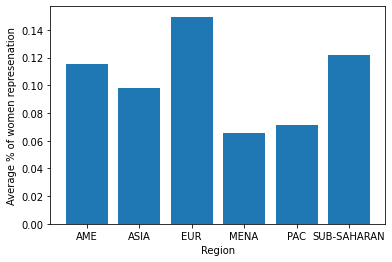

In [63]:
#Group by region and get the mean. Convert the result to a dictionary data type for accessing the regions with their respective values.
df_t =df_par.groupby(['Region'])['% Of Women in Chamber'].mean().to_dict()

names = df_t.keys()
values = df_t.values()

plt.figure()
plt.bar(names , values)
plt.xlabel('Region')
plt.ylabel('Average % of women represenation')

#### 5. For each region vizualize how the women representation changed over the time.

In [64]:
#Select European and Asian countries respectively.
regions = df_par['Region'].unique()
region_dict={}
for region in regions:
    #Filter countries for each region.
    country_list =list(df_par[df_par['Region'] == region]['Country'].unique())

    #Get average representation value
    avg = df_par[df_par['Country'].isin(country_list)].groupby(['Year'])['% Of Women in Chamber'].mean().to_dict()

    #update dictionary with values
    region_dict[region]= (avg)


Text(0, 0.5, 'Average % of female representation')

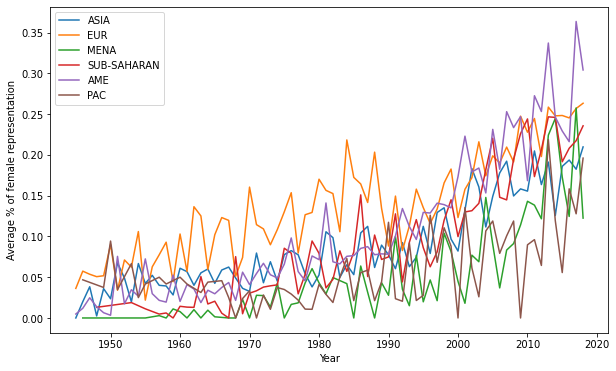

In [65]:
#Vizualization
plt.figure(figsize=(10,6))
for region in regions:
    a= pd.DataFrame.from_dict(region_dict[region],orient='index',columns=[region])
    plt.plot(a,label=region)
    plt.legend()

plt.xlabel('Year')
plt.ylabel('Average % of female representation')

#MENA - Middle East and Northern Africa
#Subsaharan -south of Sahara
#AME - American
#PAC - Asia Pasific

#Let's assume that these regions are correct.

#### 6. Which countries has/had the **most** number of chamber types?

In [66]:
#List of countries
country_list = df_par.loc[:,'Country'].unique()

#For country count the number of unique chamber types
chamber_count = dict()
for c in country_list:
    val = len(list(df_par[df_par['Country'] == c]['Chamber Type'].unique()))
    chamber_count[c] = val

#Sort dictionary by values --disply first 10 values
sorted(chamber_count.items(), key=lambda x: x[1], reverse=True)[0:10]


#Answer - Algeria, Congo (Republic of), Czechoslovakia, Ecuador, Lesotho, Liberia, Myanmar, Nicaragua, Pakistan

[('Algeria', 4),
 ('Congo (Republic of)', 4),
 ('Czechoslovakia', 4),
 ('Ecuador', 4),
 ('Lesotho', 4),
 ('Liberia', 4),
 ('Myanmar', 4),
 ('Nepal', 4),
 ('Nicaragua', 4),
 ('Pakistan', 4)]

#### 7.Historically, in the USA which chamber has the most female represenation.



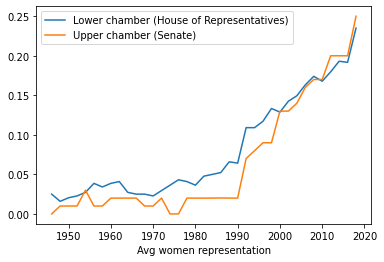

In [67]:
#Filter data for USA
df_usa = df_par[df_par['Country'] == 'United States of America']

#Filter data for chamber type despite the case of Upper and Lower
lower_data = df_usa[df_usa['Chamber Type'].str.casefold()=='lower'].loc[:,['Year','% Of Women in Chamber']]
lower_data.set_index(['Year'],inplace=True)
upper_data = df_usa[df_usa['Chamber Type'].str.casefold()=='upper'].loc[:,['Year','% Of Women in Chamber']]
upper_data.set_index(['Year'],inplace=True)


#Vizualize
plt.plot(lower_data,label='Lower chamber (House of Representatives)')
plt.plot(upper_data,label='Upper chamber (Senate)')
plt.xlabel('Year')
plt.xlabel('Avg women representation')
plt.legend()

#Lower chamber has more representation which seemed to have changed/tallied after 2010 

#### 8. List the 5 countries which have the **longest** history of female representation in the parliment?

In [68]:
#To answer this question we have to an important thing.
    #1. A country could have multiple entries in each year for different chambers.
    #2. Time can be calculated as the number of years a country has had female representation in any chamber from 1945 to 2020.



country_list = df_par['Country'].unique()
country_year_dict = {}
for c in country_list:
    country_year_dict[c] = len(df_par[df_par['Country']==c]['Year'].unique())



sorted(country_year_dict.items(), key=lambda x: x[1], reverse=True)[0:5]

#Answer - Austria, Canada, Malaysia, Japan, India

[('Austria', 73),
 ('Canada', 72),
 ('Malaysia', 60),
 ('Japan', 45),
 ('India', 43)]

#### 9. In a world map vizualize average female represenatation as of the latest recorded year.

In [69]:
country_list = df_par['Country'].unique()
country_avg = {}
for c in country_list:
    #Filter records per country
    df_c = df_par[df_par['Country'] == c]
    
    #set year as the index
    df_c.set_index('Year',inplace=True)
    
    #Get the latest year
    y = df_c.index.max()

    #Average the % Of Women in Chamber across different chambers
    avg = df_c.loc[y,'% Of Women in Chamber'].mean()

    country_avg[c] = avg
      

In [70]:
df_d = pd.DataFrame.from_dict(country_avg, orient='index', columns=['% women representation'])
df_d.reset_index(inplace=True)
df_d.columns = ['Country','% women representation']
df_d

,Country,% women representation
0,Afghanistan,0.278689
1,Albania,0.278571
2,Algeria,0.068182
3,Andorra,0.392857
4,Angola,0.309091
...,...,...
194,Yemen South (People's Democratic Republic),0.040741
195,Yugoslavia (Federal Republic of),0.048732
196,Yugoslavia (Socialist Federal Republic of),0.142045
197,Zambia,0.153111


In [71]:
import folium

#!pip3 install folium

#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
geo_map = f'{url}/world-countries.json'

#creating map object
m=folium.Map(width=550,height=350,location=[20.334591, 5.063240], zoom_start=2)

#Adding the Choropleth layer onto our map
folium.Choropleth(
    #JSON file with country data
    geo_data=geo_map,
    name='Women represenation in parliment',
    data=df_d,
    columns=['Country', '% women representation'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white',
    legend_name="Women representation in parliment (latest %)",
    fill_opacity=1,
    line_opacity=.1,
).add_to(m)
m

#### 10. Top 10% countries interms of highest and lowest women representation in the parliment.

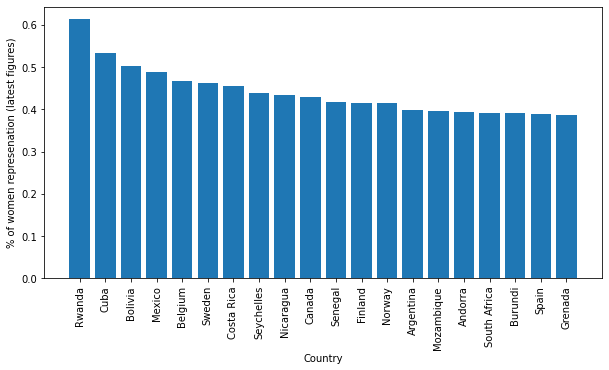

In [76]:
df_latest = df_d.sort_values(by='% women representation', ascending=False)

top10 = int(np.round(df_latest.shape[0]*0.1))

names = df_latest['Country']
values = df_latest['% women representation']

plt.figure(figsize=(10,5))
plt.bar(names[0:top10] , values[0:top10])
plt.xlabel('Country')
plt.ylabel('% of women represenation (latest figures)')
a=plt.xticks(rotation=90)


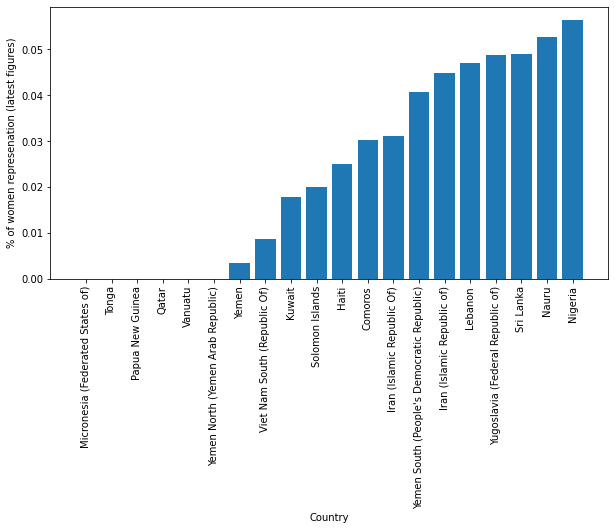

In [75]:
df_latest = df_d.sort_values(by='% women representation', ascending=True)

top10 = int(np.round(df_latest.shape[0]*0.1))

names = df_latest['Country']
values = df_latest['% women representation']

plt.figure(figsize=(10,5))
plt.bar(names[0:top10] , values[0:top10])
plt.xlabel('Country')
plt.ylabel('% of women represenation (latest figures)')
a=plt.xticks(rotation=90)


So at the end the most imoortant thing is what we learned from the analysis.

1. In all the regions of the world there is a tendancy for increasing female represenation in the parliments.
2. Europen, Subsaharan, and American regions are leading this trend.
3. According to the latest figures, while the top 10% of the countries have on average around 44% of female represenation in the parliment the least 10%'s represenatation varies from 0% to 5.6%.